In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pca import *
import torch
from torchvision import transforms, models, datasets
from cka import *

In [3]:
import torchvision.models as models

In [4]:
test_dataset_CIFAR10 = datasets.CIFAR10(root=".", train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [5]:
test_loader_CIFAR10 = torch.utils.data.DataLoader(dataset=test_dataset_CIFAR10, batch_size=128, shuffle=True)

In [6]:
model1 = models.resnet18(pretrained=True)

In [7]:
model2 = models.resnet50(pretrained=True)

In [8]:
model3 = models.densenet121(pretrained=True)

# CKA

## Single model

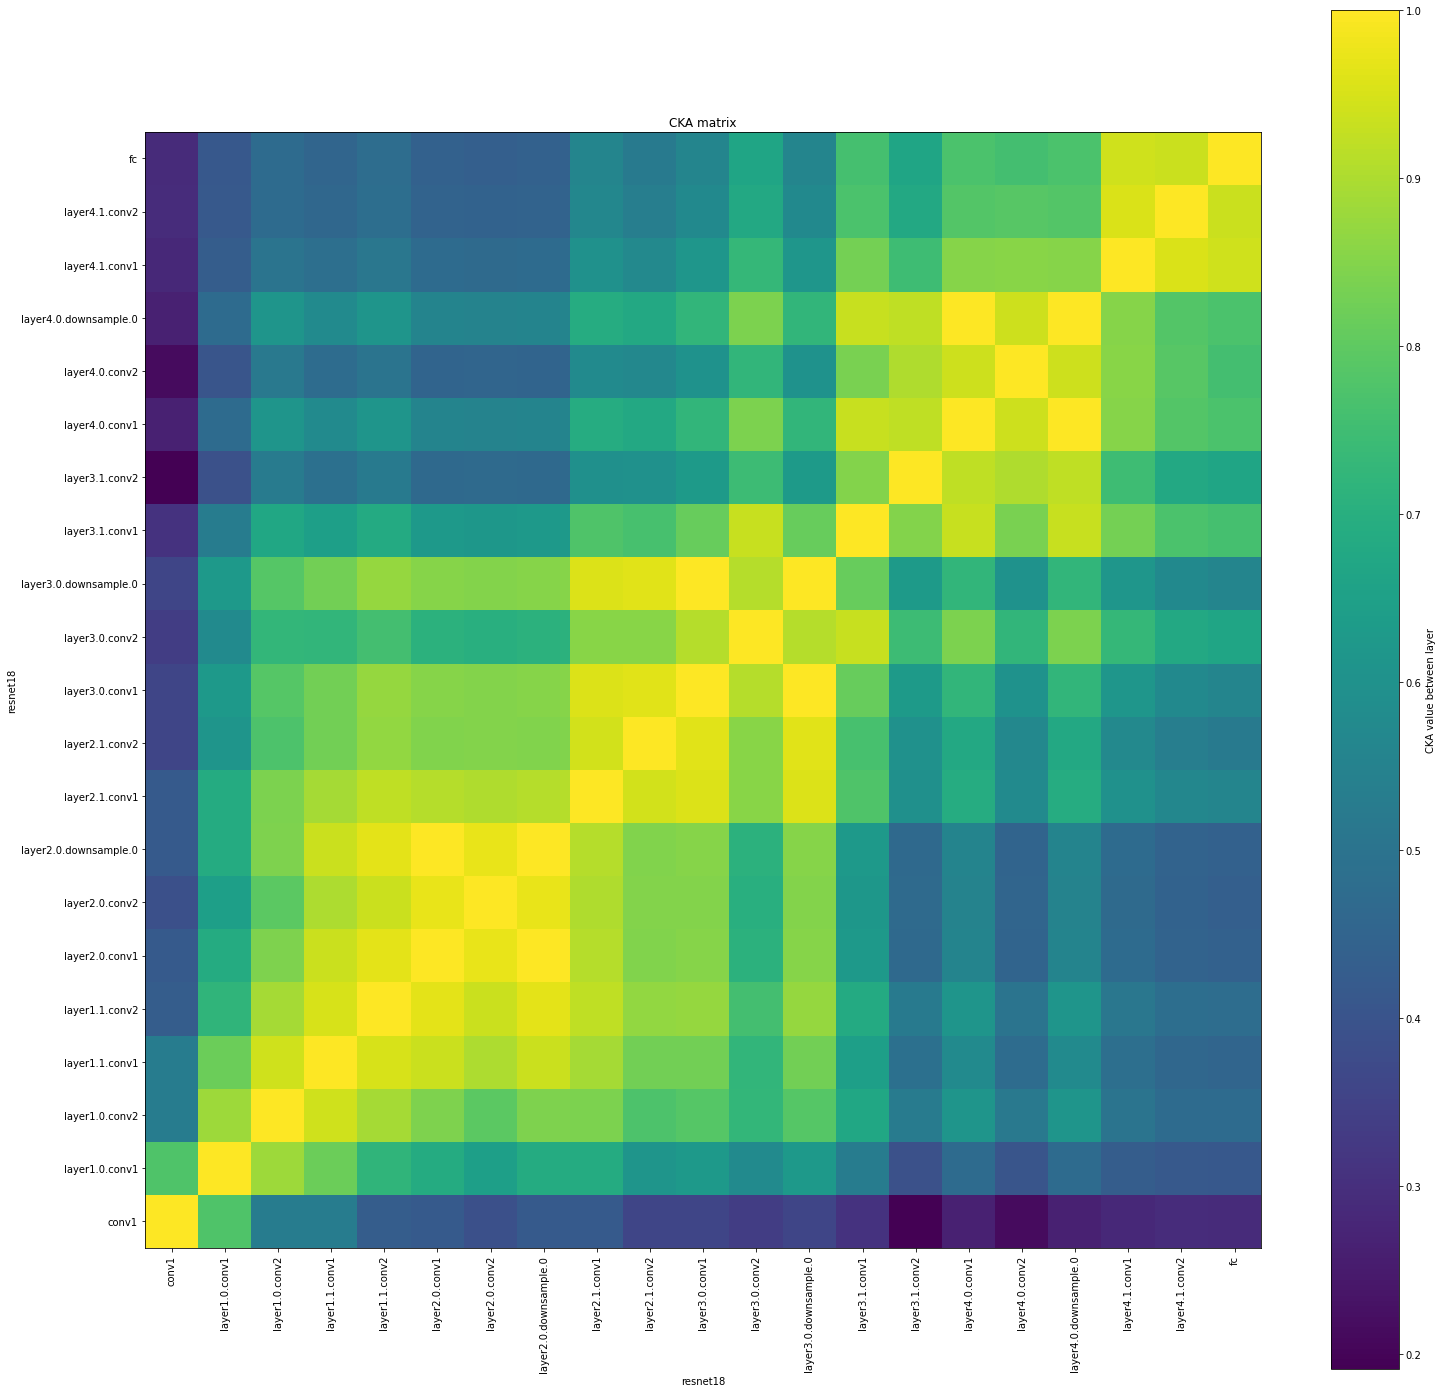

In [9]:
ckamatrix,xticks = eval_CKA(model1,test_loader_CIFAR10,num_batches=0)
plot_CKA(ckamatrix,xticks=xticks,figsize=(25,25),output_file="cka_resnet18.pdf",xlabel="resnet18",ylabel="resnet18")

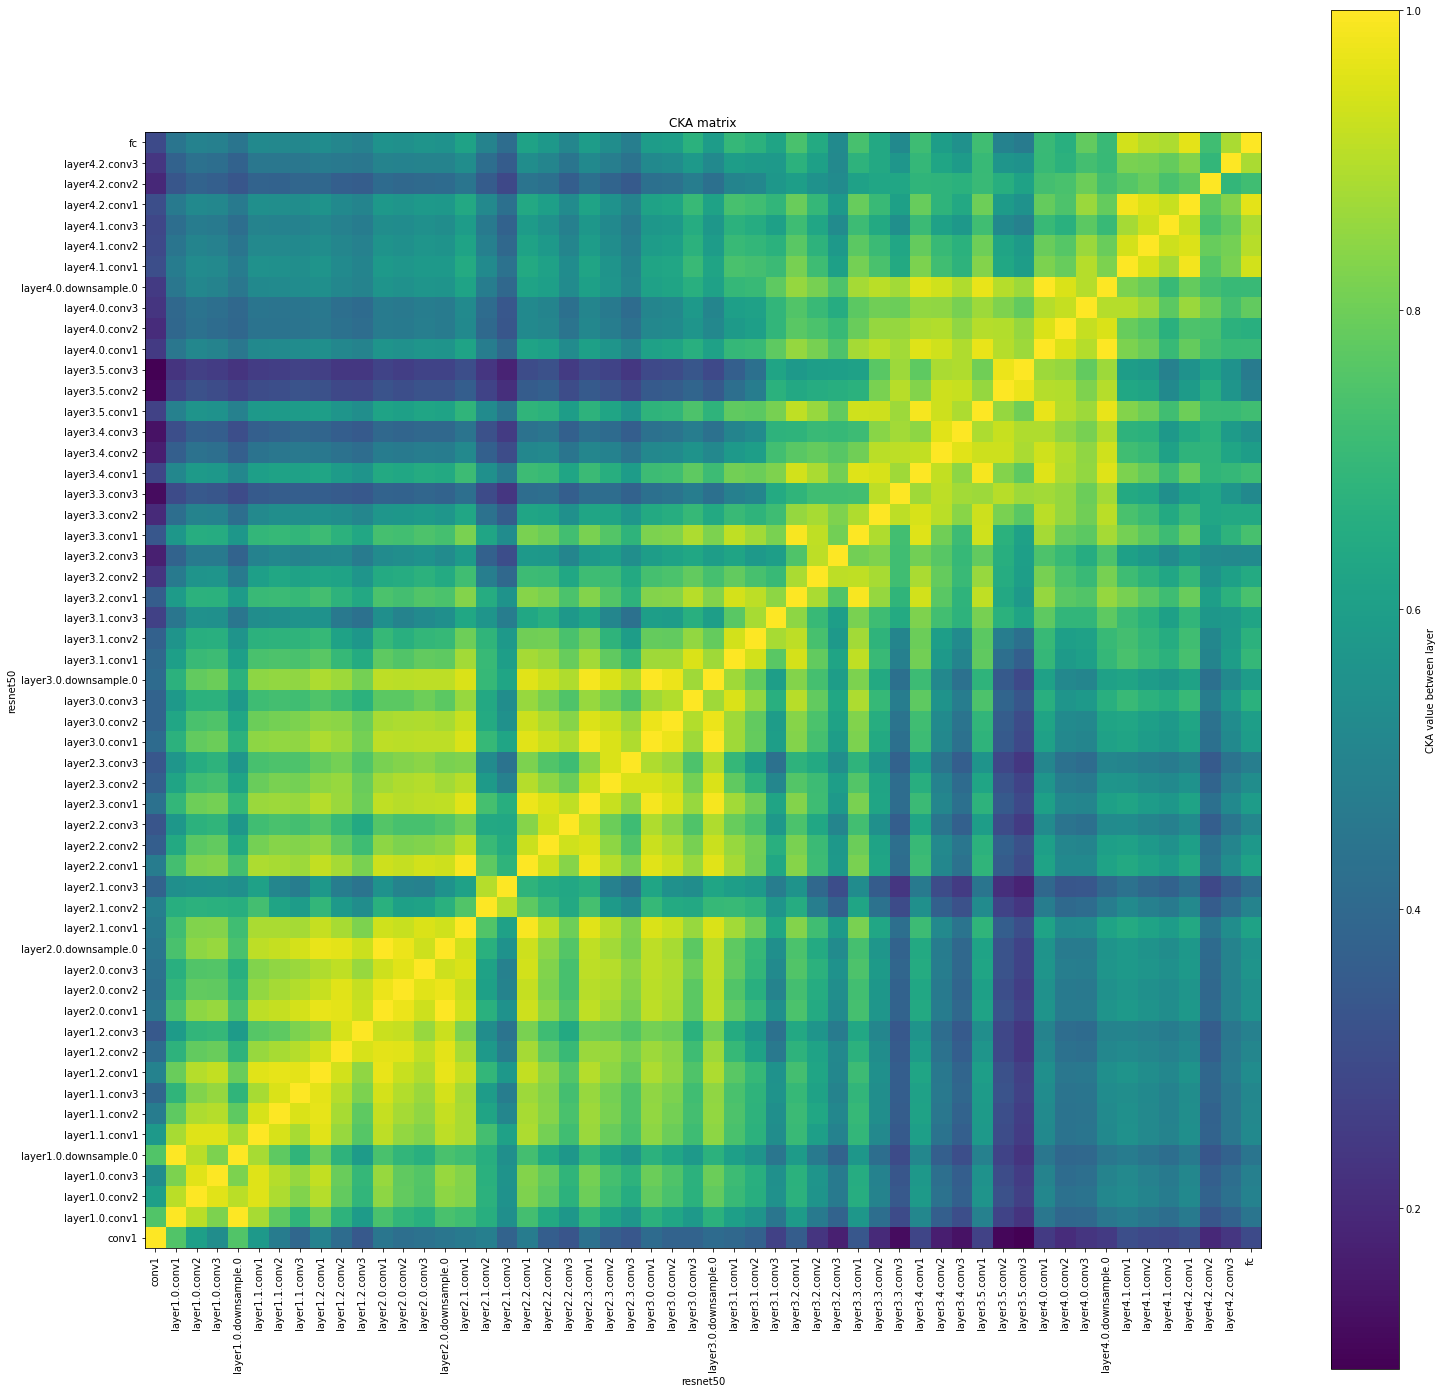

In [12]:
ckamatrix,xticks = eval_CKA(model2,test_loader_CIFAR10,num_batches=0)
plot_CKA(ckamatrix,xticks=xticks,figsize=(25,25),output_file="cka_resnet50.pdf",xlabel="resnet50",ylabel="resnet50")

In [ ]:
ckamatrix,xticks = eval_CKA(model3,test_loader_CIFAR10,num_batches=0)
plot_CKA(ckamatrix,xticks=xticks,figsize=(25,25),output_file="cka_densenet121.pdf",xlabel="Densenet121",ylabel="Densenet121")

## Model A vs Model B

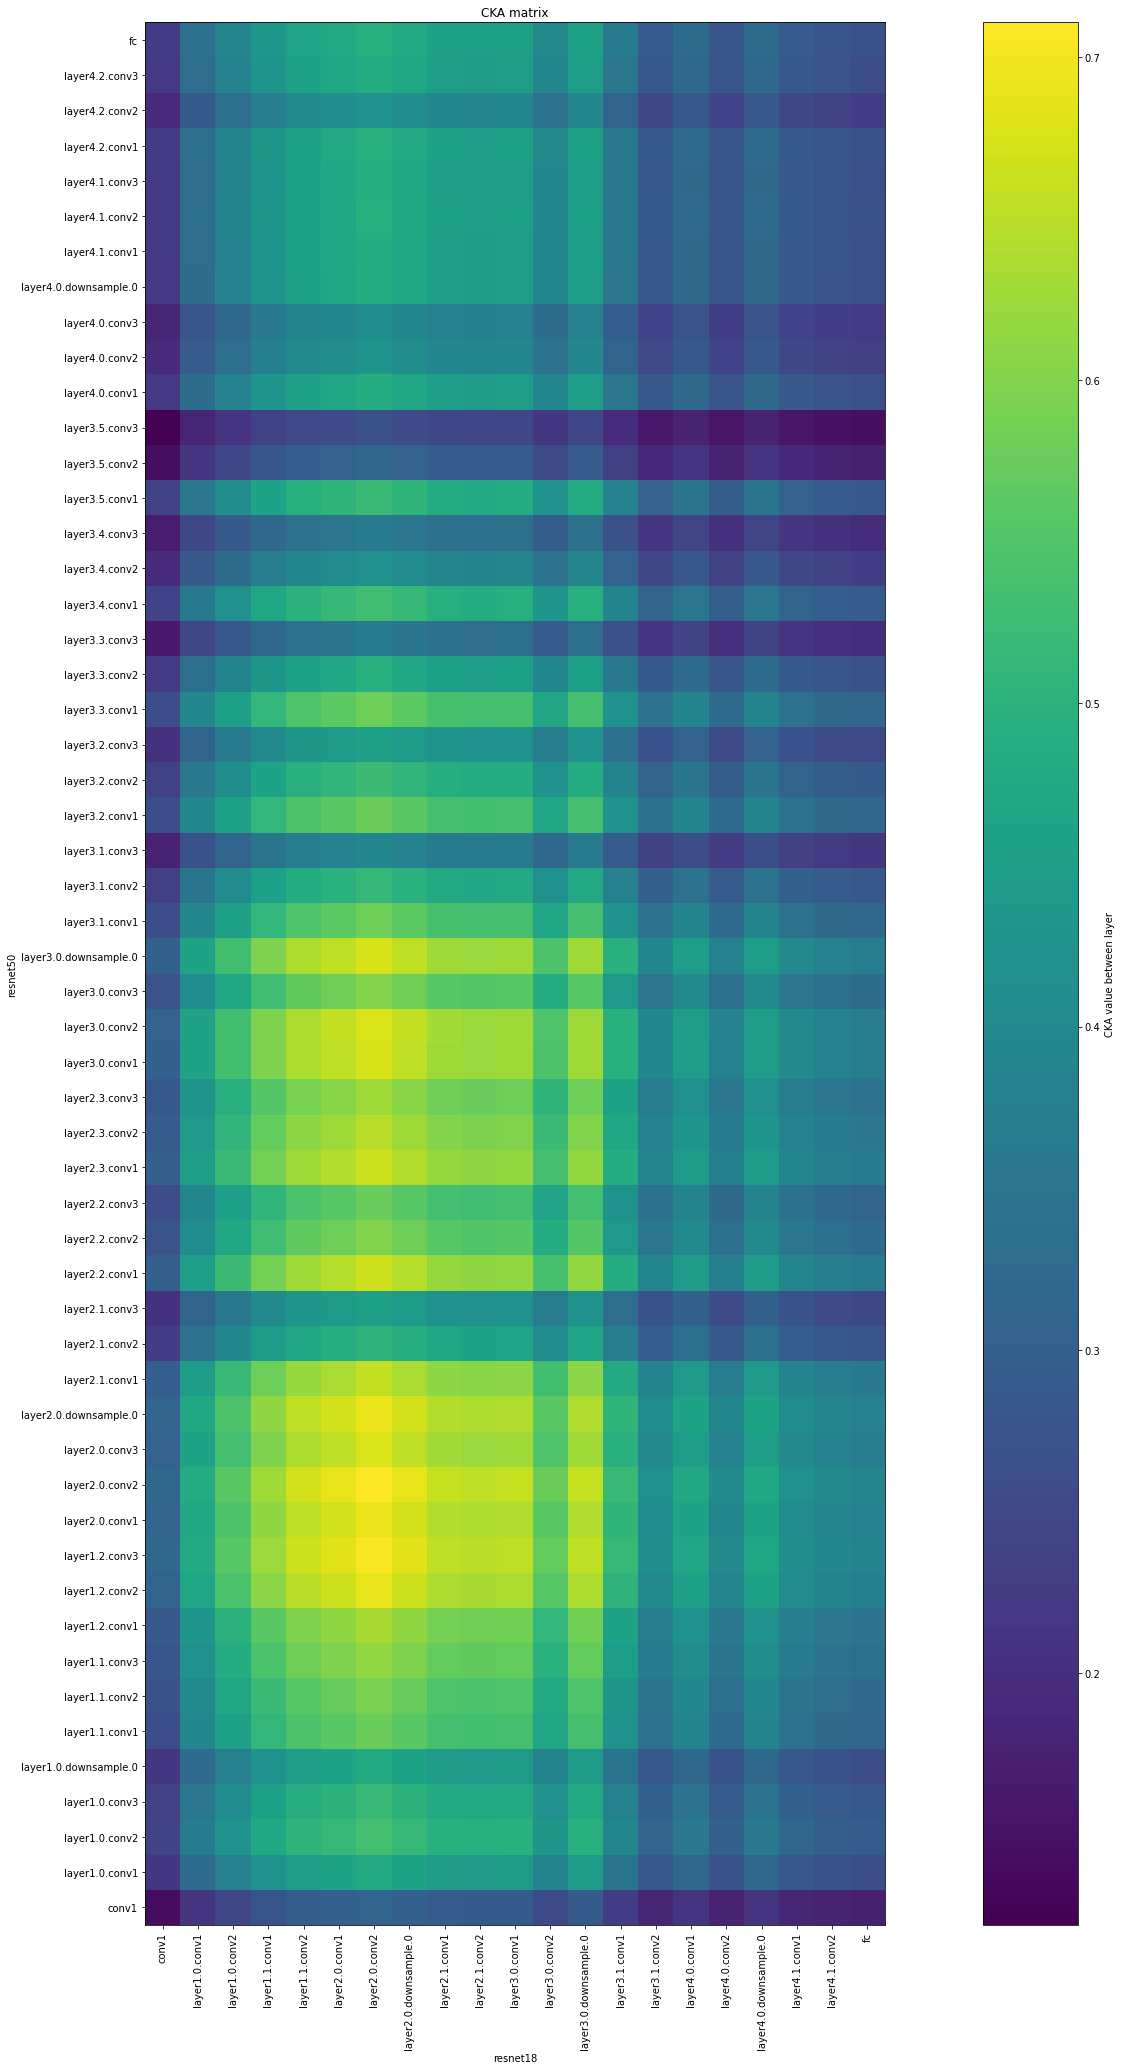

In [13]:
ckamatrix2,xticks2,yticks2 = eval_CKA(model1,test_loader_CIFAR10,model2,test_loader_CIFAR10)
plot_CKA(ckamatrix2,xticks=xticks2,yticks=yticks2,figsize=(35,35),xlabel="resnet18",ylabel="resnet50")

# PCA

In [15]:
extract_pca_features(model1,test_loader_CIFAR10,output_path="./pca_analysis1")

In [16]:
extract_pca_features(model2,test_loader_CIFAR10,output_path="./pca_analysis2")

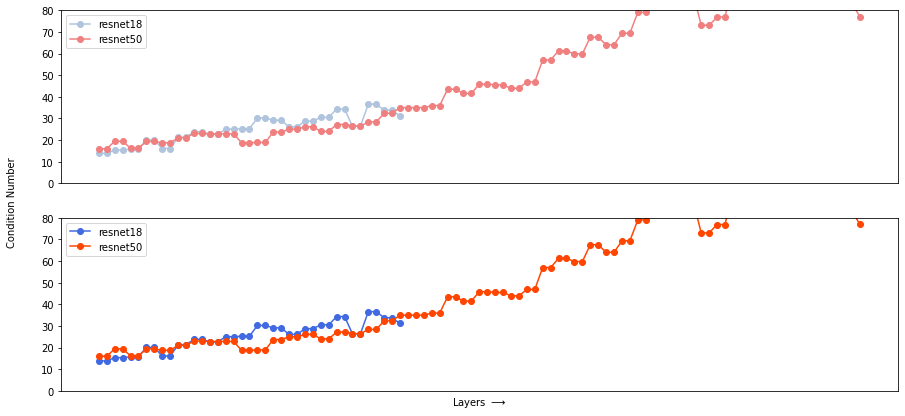

In [22]:
plot_all_ev(["./pca_analysis1","./pca_analysis2","./pca_analysis1","./pca_analysis2"],["resnet18","resnet50","resnet18","resnet50"])

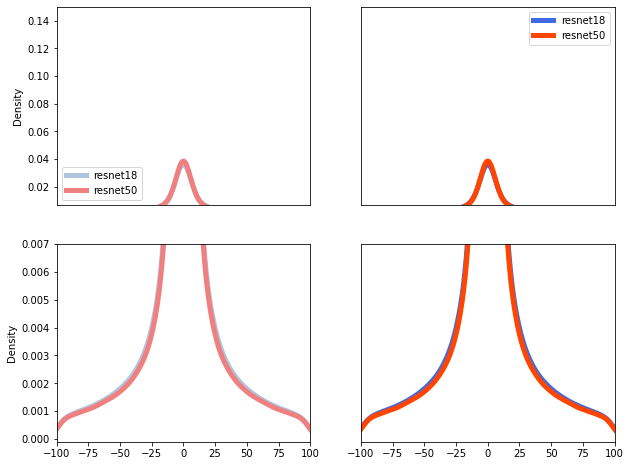

In [20]:
plot_ev(["./pca_analysis1","./pca_analysis2","./pca_analysis1","./pca_analysis2"],["resnet18","resnet50","resnet18","resnet50"])